In [1]:
import tensorflow as tf
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np
import time  

x_data = datasets.load_iris().data
y_data = datasets.load_iris().target

np.random.seed(116)  
np.random.shuffle(x_data)
np.random.seed(116)
np.random.shuffle(y_data)
tf.random.set_seed(116)

# 将打乱后的数据集分割为训练集和测试集，训练集为前120行，测试集为后30行
x_train = x_data[:-30]
y_train = y_data[:-30]
x_test = x_data[-30:]
y_test = y_data[-30:]

# 转换x的数据类型，否则后面矩阵相乘时会因数据类型不一致报错
x_train = tf.cast(x_train, tf.float32)
x_test = tf.cast(x_test, tf.float32)


train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)


w1 = tf.Variable(tf.random.truncated_normal([4, 3], stddev=0.1, seed=1))
b1 = tf.Variable(tf.random.truncated_normal([3], stddev=0.1, seed=1))

lr = 0.1  # 学习率为0.1
train_loss_results = []  # 将每轮的loss记录在此列表中，为后续画loss曲线提供数据
test_acc = []  # 将每轮的acc记录在此列表中，为后续画acc曲线提供数据
epoch = 500  # 循环500轮
loss_all = 0  # 每轮分4个step，loss_all记录四个step生成的4个loss的和

In [2]:
v_w, v_b = 0, 0 #0时刻 w和b的二阶动量初始值是0

In [3]:
now_time = time.time()
print(now_time)

1594308366.8727627


In [4]:
for epoch in range(epoch):
    for step,(x_train,y_train) in enumerate(train_db):
        with tf.GradientTape() as tape:
            y = tf.matmul(x_train,w1) + b1
            y = tf.nn.softmax(y)
            y_ = tf.one_hot(y_train,depth=3)
            loss = tf.reduce_mean(tf.square(y_ - y))
            loss_all += loss.numpy()
        grads = tape.gradient(loss,[w1,b1])        
        ### adagrad ####
        v_w += tf.square(grads[0])#梯度平方累计和
        v_b += tf.square(grads[1])
        w1.assign_sub(lr * grads[0] / tf.sqrt(v_w))
        b1.assign_sub(lr * grads[1] / tf.sqrt(v_b))
        ###############
    print("Epoch:{},loss:{}".format(epoch,loss_all / 4))
    train_loss_results.append(loss_all / 4)  # 将4个step的loss求平均记录在此变量中
    loss_all = 0  # loss_all归零，为记录下一个epoch的loss做准备
    
    # 测试部分
    # total_correct为预测对的样本个数, total_number为测试的总样本数，将这两个变量都初始化为0
    total_correct, total_number = 0, 0
    for x_test, y_test in test_db:
        # 使用更新后的参数进行预测
        y = tf.matmul(x_test, w1) + b1
        y = tf.nn.softmax(y)
        pred = tf.argmax(y, axis=1)  # 返回y中最大值的索引，即预测的分类
        # 将pred转换为y_test的数据类型
        pred = tf.cast(pred, dtype=y_test.dtype)
        # 若分类正确，则correct=1，否则为0，将bool型的结果转换为int型
        correct = tf.cast(tf.equal(pred, y_test), dtype=tf.int32)
        # 将每个batch的correct数加起来
        correct = tf.reduce_sum(correct)
        # 将所有batch中的correct数加起来
        total_correct += int(correct)
        # total_number为测试的总样本数，也就是x_test的行数，shape[0]返回变量的行数
        total_number += x_test.shape[0]
    # 总的准确率等于total_correct/total_number
    acc = total_correct / total_number
    test_acc.append(acc)
    print("Test_acc:", acc)
    print("--------------------------")

Epoch:0,loss:0.2528788633644581
Test_acc: 0.5333333333333333
--------------------------
Epoch:1,loss:0.17821525409817696
Test_acc: 0.5333333333333333
--------------------------
Epoch:2,loss:0.15621443092823029
Test_acc: 0.5333333333333333
--------------------------
Epoch:3,loss:0.1420477293431759
Test_acc: 0.5333333333333333
--------------------------
Epoch:4,loss:0.13362513668835163
Test_acc: 0.5333333333333333
--------------------------
Epoch:5,loss:0.1275476086884737
Test_acc: 0.5333333333333333
--------------------------
Epoch:6,loss:0.12286805734038353
Test_acc: 0.5333333333333333
--------------------------
Epoch:7,loss:0.11908590793609619
Test_acc: 0.5333333333333333
--------------------------
Epoch:8,loss:0.11591362580657005
Test_acc: 0.5333333333333333
--------------------------
Epoch:9,loss:0.11317718587815762
Test_acc: 0.5333333333333333
--------------------------
Epoch:10,loss:0.11076570674777031
Test_acc: 0.5333333333333333
--------------------------
Epoch:11,loss:0.1086051

Test_acc: 1.0
--------------------------
Epoch:100,loss:0.057533202692866325
Test_acc: 1.0
--------------------------
Epoch:101,loss:0.05731738731265068
Test_acc: 1.0
--------------------------
Epoch:102,loss:0.057104241102933884
Test_acc: 1.0
--------------------------
Epoch:103,loss:0.056893715634942055
Test_acc: 1.0
--------------------------
Epoch:104,loss:0.056685774587094784
Test_acc: 1.0
--------------------------
Epoch:105,loss:0.056480354629457
Test_acc: 1.0
--------------------------
Epoch:106,loss:0.05627741012722254
Test_acc: 1.0
--------------------------
Epoch:107,loss:0.0560768973082304
Test_acc: 1.0
--------------------------
Epoch:108,loss:0.055878762155771255
Test_acc: 1.0
--------------------------
Epoch:109,loss:0.05568297579884529
Test_acc: 1.0
--------------------------
Epoch:110,loss:0.055489485152065754
Test_acc: 1.0
--------------------------
Epoch:111,loss:0.05529824271798134
Test_acc: 1.0
--------------------------
Epoch:112,loss:0.05510922335088253
Test_acc:

Test_acc: 1.0
--------------------------
Epoch:210,loss:0.04325979296118021
Test_acc: 1.0
--------------------------
Epoch:211,loss:0.04318152088671923
Test_acc: 1.0
--------------------------
Epoch:212,loss:0.04310378897935152
Test_acc: 1.0
--------------------------
Epoch:213,loss:0.04302659910172224
Test_acc: 1.0
--------------------------
Epoch:214,loss:0.04294993914663792
Test_acc: 1.0
--------------------------
Epoch:215,loss:0.0428738035261631
Test_acc: 1.0
--------------------------
Epoch:216,loss:0.04279818665236235
Test_acc: 1.0
--------------------------
Epoch:217,loss:0.042723086662590504
Test_acc: 1.0
--------------------------
Epoch:218,loss:0.04264849238097668
Test_acc: 1.0
--------------------------
Epoch:219,loss:0.04257440287619829
Test_acc: 1.0
--------------------------
Epoch:220,loss:0.0425008125603199
Test_acc: 1.0
--------------------------
Epoch:221,loss:0.042427713982760906
Test_acc: 1.0
--------------------------
Epoch:222,loss:0.04235510341823101
Test_acc: 1.

Test_acc: 1.0
--------------------------
Epoch:327,loss:0.036700986325740814
Test_acc: 1.0
--------------------------
Epoch:328,loss:0.036660803481936455
Test_acc: 1.0
--------------------------
Epoch:329,loss:0.03662080969661474
Test_acc: 1.0
--------------------------
Epoch:330,loss:0.036581003572791815
Test_acc: 1.0
--------------------------
Epoch:331,loss:0.0365413841791451
Test_acc: 1.0
--------------------------
Epoch:332,loss:0.03650194592773914
Test_acc: 1.0
--------------------------
Epoch:333,loss:0.036462686490267515
Test_acc: 1.0
--------------------------
Epoch:334,loss:0.03642361657693982
Test_acc: 1.0
--------------------------
Epoch:335,loss:0.03638472454622388
Test_acc: 1.0
--------------------------
Epoch:336,loss:0.03634601039811969
Test_acc: 1.0
--------------------------
Epoch:337,loss:0.036307476460933685
Test_acc: 1.0
--------------------------
Epoch:338,loss:0.03626911295577884
Test_acc: 1.0
--------------------------
Epoch:339,loss:0.036230926401913166
Test_ac

Epoch:435,loss:0.03322295472025871
Test_acc: 1.0
--------------------------
Epoch:436,loss:0.033197169192135334
Test_acc: 1.0
--------------------------
Epoch:437,loss:0.033171471673995256
Test_acc: 1.0
--------------------------
Epoch:438,loss:0.03314586589112878
Test_acc: 1.0
--------------------------
Epoch:439,loss:0.03312035324051976
Test_acc: 1.0
--------------------------
Epoch:440,loss:0.033094930462539196
Test_acc: 1.0
--------------------------
Epoch:441,loss:0.03306959290057421
Test_acc: 1.0
--------------------------
Epoch:442,loss:0.03304435545578599
Test_acc: 1.0
--------------------------
Epoch:443,loss:0.033019198570400476
Test_acc: 1.0
--------------------------
Epoch:444,loss:0.032994134817272425
Test_acc: 1.0
--------------------------
Epoch:445,loss:0.0329691618680954
Test_acc: 1.0
--------------------------
Epoch:446,loss:0.032944271340966225
Test_acc: 1.0
--------------------------
Epoch:447,loss:0.03291947115212679
Test_acc: 1.0
--------------------------
Epoch:4

total_time 6.323723316192627


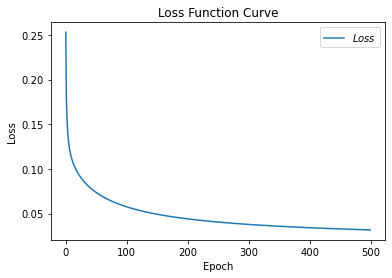

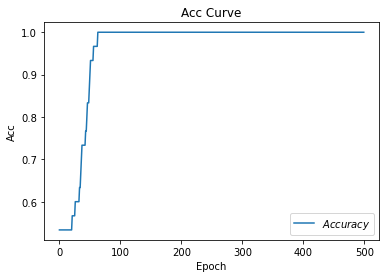

In [5]:
total_time = time.time() - now_time  ##3##
print("total_time", total_time)  ##4##
# 绘制 loss 曲线
plt.title('Loss Function Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Loss')  # y轴变量名称
plt.plot(train_loss_results, label="$Loss$")  # 逐点画出trian_loss_results值并连线，连线图标是Loss
plt.legend()  # 画出曲线图标
plt.show()  # 画出图像

# 绘制 Accuracy 曲线
plt.title('Acc Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Acc')  # y轴变量名称
plt.plot(test_acc, label="$Accuracy$")  # 逐点画出test_acc值并连线，连线图标是Accuracy
plt.legend()
plt.show()

# 请将loss曲线、ACC曲线、total_time记录到 class2\优化器对比.docx  对比各优化器收敛情况